# Predição de Análise de Crédito - Marlysson Silva

## Tabela de conteúdo

- Conhecendo o dataset
- Exploração do Dataset
    - Tratamento dos dados
    - Análise descritiva dos dados
    - Visualizando agrupamentos
    - Correlação entre variáveis
- Predição
    - Algoritmos
        - Naive Bayes
        - AdaBoost
        - OneVsOne
        - OneVsRest
        - K-Folding
        - Random Forest
        - Logistic Regression

## Conhecendo o dataset

Essa análise se baseará no dataset fornecido pelo repositório de dados UCI Machile Learning Repository, onde pode ser encontrado direto através deste [link](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data))

### Informações gerais

**NOME:** Statlog (German Credit Data) Data Set

**DESCRIÇÃO: ** Neste dataset da UCI Repository há o conjunto de dados a respeito da qualificação dos clientes de um banco alemão identificando-os como bons ou maus pagadores de empréstimos, ou seja, se são clientes confiáveis para que seja concedido a eles um montante de crédito, com a confiança de que não haverá calote por parte do cliente.

**DIMENSIONALIDADE DO DATASET:** 1000 Linhas x 21 Colunas

### Informações exploratórias

> **COLUNAS DO DATASET E SEUS SIGNIFICADOS**

1. **STATUS OF EXISTING CHECKING ACCOUNT :** Montante existente atualmente na conta.
1. **DURATION IN MONTH :** Significa a duração em meses do empréstimo concedido.
1. **CREDIT HISTORY :** Informações descritivas sobre o histórico financeiro do cliente. Se os créditos antigos dele estão quitados, se ainda está devendo, se até agora os créditos dele estão em bom estado.
1. **PURPOSE :** Propósito destinado para o crédito concedido.
1. **CREDIT AMOUNT :** Montante de crédito requisitado ao banco.
1. **SAVINGS ACCOUNT/BOUNDS :** Montante guardado na conta poupança.
1. **PRESENT EMPLOYMENT SINCE :** Tempo de empregado no atual emprego.
1. **INSTALLMENT RATE IN PERCENTAGE OF DISPOSABLE INCOME :** Taxa de de prestação sobre o montante( rendimento ) que o cliente possui.
1. **PERSONAL STATUS AND SEX :** Estado civil e sexo do cliente.
1. **OTHERS DEBTORS/ GUARANTORS :** Tipo de associação em créditos concedidos que já participou.
1. **PRESENT RESIDENCE SINCE :** Tempo de moradia na residência atual.
1. **PROPERTY :** Propriedades que possui.
1. **AGE IN YEARS :** Idade
1. **OTHERS INSTALLMENT PLANS :** Outros empreendimentos que requerem pagamento de prestações.
1. **HOUSING :** Tipo de propriedade da residência.
1. **NUMBER OF EXISTING CREDITS AT THIS BANK :** Número de créditos já concedidos no banco.
1. **JOB :** Estado do trabalho atual
1. **NUMBER OF PEOPLE BEING LIABLE TO PROVIDE MAINTENANCE FOR :** Total de dependentes.
1. **TELEPHONE :** Indicativo se o cliente possui telefone ou não.
1. **FOREIGN WORKER :** Indicando se o cliente é de outra cidade ou se trabalha na mesma cidade do trabalho.
1. **STATE RISK :** Coluna indicando se o cliente em questão é um bom cliente para permitir créditos ou não.

> **OBJETIVO DO DATASET E DA EXPLORAÇÃO DOS DADOS**

Esse dataset possui alguns atributos com relação ao histórico de crédito do cliente, montante acumulado e algumas outras propriedades com relação à valores monetários.

Com todos esses atributos, balanceando o nível de confiança do cliente é possível com a aplicação de algoritmos de aprendizagem de máquina descobrir se **há risco ou não com relação ao banco ter prejuízo ao conceder crédito à determinado tipo de cliente**.

# Exploração do Dataset

In [2]:
import pandas as pd

**OBS:** O dataset provido inicialmente há um problema de "legibilidade" , pois suas colunas não são nomeadas e seus valores estão preenchidos com valores que não dizem muita coisa sobre o que eles significam. Sabendo disso faremos:

1. Um tratamento inicialmente nas colunas para identificá-las quanto ao que elas significam
1. Mapeamento das siglas usadas para seus reais valores.

> **RENOMEANDO COLUNAS PARA UAM MELHOR VISUALIZAÇÃO**

In [3]:
atributos = ["montante", "duracao", "historico_credito", 
              "proposito", "montante_credito", "poupanca",
              "tempo_empregado","taxa_parcelamento",
              "estado_civil_sexo","tipo_participacao_credito", 
              "tempo_moradia", "propriedade","idade",
              "gastos_adicionais", "habitacao","quantidade_creditos","emprego",
              "dependentes","telefone","trabalhador_estrangeiro","risco"]

In [4]:
df = pd.read_csv("credit_approval.txt",header=None, sep=" ",names=atributos)

In [5]:
df.head(3)

,montante,duracao,historico_credito,proposito,montante_credito,poupanca,tempo_empregado,taxa_parcelamento,estado_civil_sexo,tipo_participacao_credito,...,propriedade,idade,gastos_adicionais,habitacao,quantidade_creditos,emprego,dependentes,telefone,trabalhador_estrangeiro,risco
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1


## Transformação dos dados - Limpando dados para melhor visualização

> **Como o DATAFRAME não possuia os valores reais em suas células é necessário um processamento para visualizar as informações relacionadas ao DATAFRAME, como substituir legendas por valores reais, é isso que iremos fazer agora.**

1. Mapear valores das células para melhor descrição
2. Renomear todo o dataframe com essas associações

In [6]:
codigos_historico_de_creditos = {
    "A30": "no credits taken/all credits paid back duly",
    "A31": "all credits at this bank paid back duly",
    "A32": "existing credits paid back duly till now",
    "A33": "delay in paying off in the past",
    "A34": "critical account/other credits existing (not at this bank)"
}

codigos_proposito = {
    "A40": "car(new)",
    "A41": "car(used)",
    "A42": "furniture/equipment",
    "A43": "radio/television",
    "A44": "domestic appliances",
    "A45": "repairs",
    "A46": "education",
    "A47": "vacation",
    "A48": "retraining",
    "A49": "business",
    "A410": "others"
}

codigo_estado_civil_sexo = {
    "A91": "male : divorced/separated",
    "A92": "female : divorced/separated/married",
    "A93": "male : single",
    "A94": "male : married/windowed",
    "A95": "female : single"
}

codigos_outros_devedores = {
    "A101": None,
    "A102": "co-applicant",
    "A103": "guarantor",
}

codigos_propriedade = {
    "A121": "real state",
    "A122": "building society/life insurance",
    "A123": "car",
    "A124": "unknown/no property"
}

codigos_planos_de_parcelamento = {
    "A141": "bank",
    "A142": "stores",
    "A143": "None"
}

codigos_residencia = {
    "A151": "rent",
    "A152": "own",
    "A153": "for free"
}

codigos_estado_emprego = {
    "A171": "unemployed/unskilled-non-resident",
    "A172": "unskilled-resident",
    "A173": "skilled employee/official",
    "A174": "management/self-employed/highly qualified employee/officer"
}

codigos_telefone = {
    "A191": None,
    "A192": "yes"
}

codigos_trabalhador_estrangeiro = {
    "A201": "yes",
    "A202": "no"
}

> **Mapeando variáveis contínuas**

In [7]:
codigos_status_atual_conta_corrente = {
    "A11": "< 0",
    "A12": "< 199",
    "A13": ">= 200",
    "A14": None
}

codigos_reserva_poupanca = {
    "A61": "< 100",
    "A62": "< 499",
    "A63": "< 999",
    "A64": ">= 1000",
    "A65": "unknown"
}

codigos_tempo_emprego = {
    "A71": None,
    "A72": "< 1", # Menos de 1 ano
    "A73": "< 4", # Entre 1 ano e menos que 4 anos
    "A74": "< 7", # Entre 4 anos e menos que 7 anos
    "A75": ">= 7" # Mais de 7 anos
}

In [8]:
colunas_para_codigos = {
    "montante"             : codigos_status_atual_conta_corrente,
    "historico_credito"    : codigos_historico_de_creditos,
    "proposito"            : codigos_proposito,
    "poupanca"             : codigos_reserva_poupanca,
    "tempo_empregado"      : codigos_tempo_emprego,
    "estado_civil_sexo"    : codigo_estado_civil_sexo, 
    "tipo_participacao_credito"     : codigos_outros_devedores,
    "propriedade"          : codigos_propriedade,
    "gastos_adicionais": codigos_planos_de_parcelamento,
    "habitacao"            : codigos_residencia,
    "emprego"              : codigos_estado_emprego,
    "telefone"             : codigos_telefone,
    "trabalhador_estrangeiro"  : codigos_trabalhador_estrangeiro
}

> **Mapeando cada colunas associando para seus respectivos valores**

In [9]:
df.replace(colunas_para_codigos,inplace=True)

In [10]:
df.head(3)

,montante,duracao,historico_credito,proposito,montante_credito,poupanca,tempo_empregado,taxa_parcelamento,estado_civil_sexo,tipo_participacao_credito,...,propriedade,idade,gastos_adicionais,habitacao,quantidade_creditos,emprego,dependentes,telefone,trabalhador_estrangeiro,risco
0,< 0,6,critical account/other credits existing (not a...,radio/television,1169,unknown,>= 7,4,male : single,None,...,real state,67,None,own,2,skilled employee/official,1,yes,yes,1
1,< 199,48,existing credits paid back duly till now,radio/television,5951,< 100,< 4,2,female : divorced/separated/married,None,...,real state,22,None,own,1,skilled employee/official,1,None,yes,2
2,None,12,critical account/other credits existing (not a...,education,2096,< 100,< 7,2,male : single,None,...,real state,49,None,own,1,unskilled-resident,2,None,yes,1


In [11]:
df.replace({"unknown":None},inplace=True)

> **TIPOS DAS COLUNAS DO DATASET**

In [12]:
df.dtypes

montante                     object
duracao                       int64
historico_credito            object
proposito                    object
montante_credito              int64
poupanca                     object
tempo_empregado              object
taxa_parcelamento             int64
estado_civil_sexo            object
tipo_participacao_credito    object
tempo_moradia                 int64
propriedade                  object
idade                         int64
gastos_adicionais            object
habitacao                    object
quantidade_creditos           int64
emprego                      object
dependentes                   int64
telefone                     object
trabalhador_estrangeiro      object
risco                         int64
dtype: object

> **EXPLORAÇÃO DOS CAMPOS NULOS**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
montante                     606 non-null object
duracao                      1000 non-null int64
historico_credito            1000 non-null object
proposito                    1000 non-null object
montante_credito             1000 non-null int64
poupanca                     817 non-null object
tempo_empregado              938 non-null object
taxa_parcelamento            1000 non-null int64
estado_civil_sexo            1000 non-null object
tipo_participacao_credito    93 non-null object
tempo_moradia                1000 non-null int64
propriedade                  1000 non-null object
idade                        1000 non-null int64
gastos_adicionais            1000 non-null object
habitacao                    1000 non-null object
quantidade_creditos          1000 non-null int64
emprego                      1000 non-null object
dependentes                  1000 non-null int64
telefo

## Tratamento das colunas

> **CRIAÇÃO DOS CAMPOS: **
- **estado_civil**
- **sexo**

> **JUSTIFICATIVA**
- Poder fazer correlação se o sexo e o estado civil da pessoa interfere no sucesso ou não da disponibilidade de crédito.
- Gráficos descritivos para visualizar distribuição dessas categorias perante o sucesso ou não.

In [14]:
def criar_sexo_e_estado_civil(coluna):
    dados_separados = coluna.split(":")
    
    sexo = dados_separados[0].strip()
    estado_civil = dados_separados[1].strip()

    return pd.Series([sexo,estado_civil])

In [15]:
df[["sexo","estado_civil"]] = df["estado_civil_sexo"].apply(criar_sexo_e_estado_civil)

> **REMOÇÃO DE COLUNAS: **
 - **telefone**
 - **trabalhador_estrangeiro**
 - **estado_civil_sexo ( coluna decomposta )**
 - **tipo_participacao_credito**

> **JUSTIFICATIVA**
- **Telefone:** não possui impacto significativo em estar ou não no dataset, visto que são 2 possíveis valores
- **Trabalhador estrangeiro:** não possui muitos valores que possam impactar no resultado final
- **Estado civil e sexo:** foi removida pois foi decomposta em outras colunas no dataset
- **Tipo participacao credito**: foi removida pois não dá mais detalhes sobre o dado... somente uma descrição e nada mais. Juguei desnecessário o uso.

In [16]:
colunas = ["telefone","trabalhador_estrangeiro", "estado_civil_sexo","gastos_adicionais","tipo_participacao_credito"]
df = df.drop(colunas,axis=1)

In [17]:
df.dtypes

montante               object
duracao                 int64
historico_credito      object
proposito              object
montante_credito        int64
poupanca               object
tempo_empregado        object
taxa_parcelamento       int64
tempo_moradia           int64
propriedade            object
idade                   int64
habitacao              object
quantidade_creditos     int64
emprego                object
dependentes             int64
risco                   int64
sexo                   object
estado_civil           object
dtype: object

## Análise descritiva dos dados

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

> **AGRUPAMENTO DA DISTRIBUIÇÃO DAS QUANTIDADES DE MONTANTES**

Text(0.5,1,'Contagem do montante por tipo')

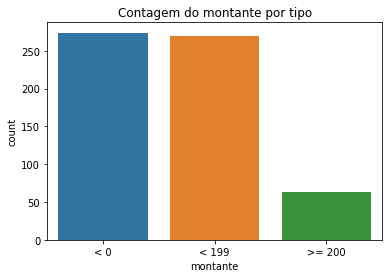

In [19]:
a = sns.countplot(x="montante",data=df)
a.set_title("Contagem do montante por tipo")

> **ANÁLISE DE CORRELAÇÃO ENTRE AS VARIÁVEIS DO DATASET**

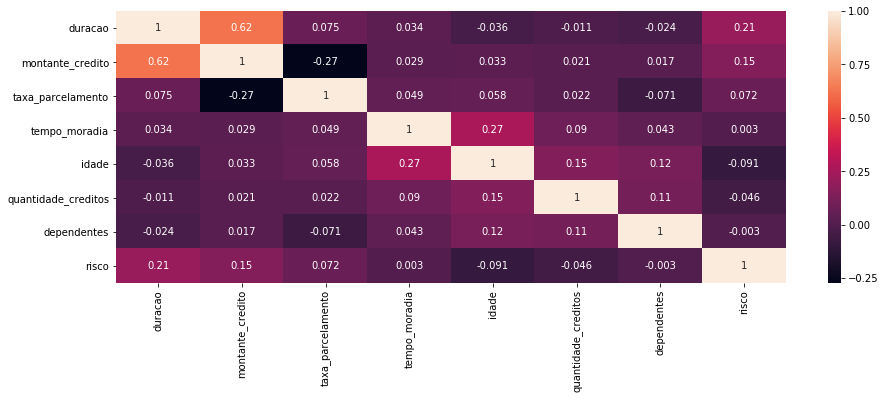

In [20]:
plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(),annot=True)

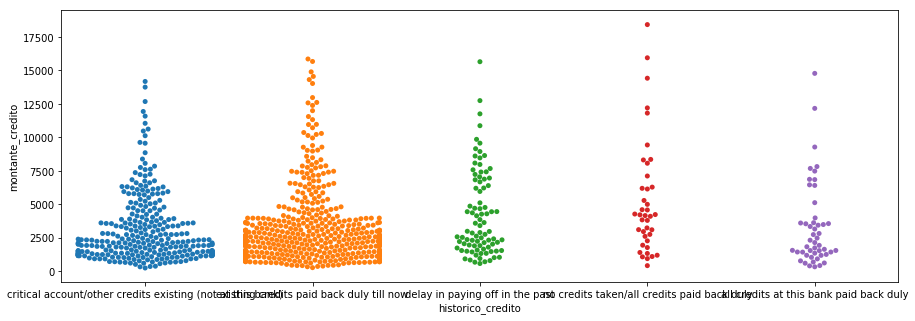

In [322]:
plt.figure(figsize=(15, 5))
sns.swarmplot(x="historico_credito",y="montante_credito",data=df)

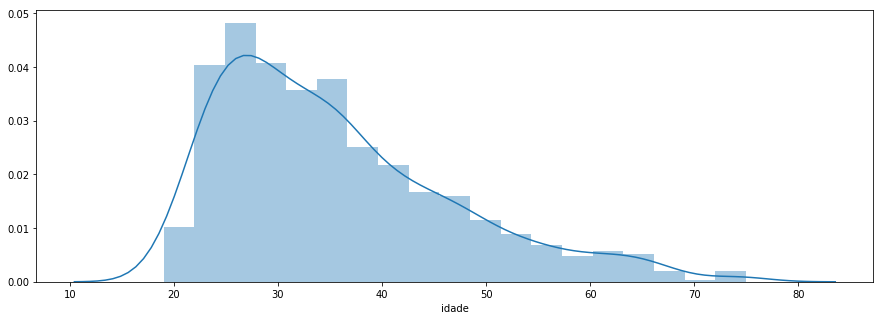

In [323]:
plt.figure(figsize=(15, 5))
sns.distplot(df.idade)

In [324]:
df.head()

,montante,duracao,historico_credito,proposito,montante_credito,poupanca,tempo_empregado,taxa_parcelamento,tempo_moradia,propriedade,idade,habitacao,quantidade_creditos,emprego,dependentes,risco,sexo,estado_civil
0,< 0,6,critical account/other credits existing (not a...,radio/television,1169,None,>= 7,4,4,real state,67,own,2,skilled employee/official,1,1,male,single
1,< 199,48,existing credits paid back duly till now,radio/television,5951,< 100,< 4,2,2,real state,22,own,1,skilled employee/official,1,2,female,divorced/separated/married
2,None,12,critical account/other credits existing (not a...,education,2096,< 100,< 7,2,3,real state,49,own,1,unskilled-resident,2,1,male,single
3,< 0,42,existing credits paid back duly till now,furniture/equipment,7882,< 100,< 7,2,4,building society/life insurance,45,for free,1,skilled employee/official,2,1,male,single
4,< 0,24,delay in paying off in the past,car(new),4870,< 100,< 4,3,4,unknown/no property,53,for free,2,skilled employee/official,2,2,male,single


# Limpando os dados para aplicação dos algoritmos

In [23]:
def mapear_valores(coluna):
    valores = tuple(set(df[coluna].values))

    associados = tuple(range(len(valores)))

    df[coluna].replace(valores,associados,inplace=True)

In [24]:
colunas = ["historico_credito","montante","proposito","poupanca",
           "tempo_empregado","propriedade","habitacao",
           "emprego","sexo","estado_civil"]

for coluna in colunas:
    mapear_valores(coluna)

In [25]:
df.head()

,montante,duracao,historico_credito,proposito,montante_credito,poupanca,tempo_empregado,taxa_parcelamento,tempo_moradia,propriedade,idade,habitacao,quantidade_creditos,emprego,dependentes,risco,sexo,estado_civil
0,0,6,1,1,1169,2,3,4,4,3,67,0,2,0,1,1,0,2
1,3,48,0,1,5951,3,4,2,2,3,22,0,1,0,1,2,1,1
2,2,12,1,6,2096,3,0,2,3,3,49,0,1,3,2,1,0,2
3,0,42,0,4,7882,3,0,2,4,2,45,1,1,0,2,1,0,2
4,0,24,3,8,4870,3,4,3,4,1,53,1,2,0,2,2,0,2


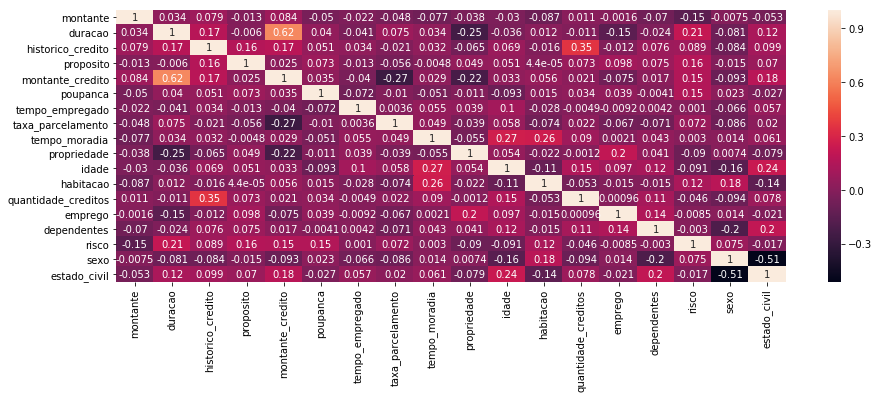

In [26]:
plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(),annot=True)

# Aplicando algoritmos

> **SEPARAÇÃO DOS DADOS PARA TREINO E TESTE**

In [226]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [349]:
x = df.drop('risco', 1).values
y = df["risco"].values

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

### Algoritmo Naive Bayes

In [227]:
def aplicar_modelo(modelo, x_treino, y_treino, x_teste, y_teste):
    
    modelo.fit(x_treino,y_treino)
    
    predicao = modelo.predict(x_teste)
    
    return accuracy_score(y_teste,predicao)

In [127]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

naive = MultinomialNB()

resultado = aplicar_modelo(naive,x_treino,y_treino, x_teste,y_teste)

In [128]:
print("Naive Bayes: {}".format(resultado))

Naive Bayes: 0.692


### Algoritmo Adaboost

In [129]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier()

resultado = aplicar_modelo(ada_boost,x_treino,y_treino, x_teste,y_teste)

In [130]:
print("Ada boost: {}".format(resultado))

Ada boost: 0.7


### Algoritmo RandomForest

In [131]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

resultado = aplicar_modelo(random_forest,x_treino,y_treino, x_teste,y_teste)

In [132]:
print("Random Forest: {}".format(resultado))

Random Forest: 0.732


### Algoritmo Regressão Logística

In [133]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()

resultado = aplicar_modelo(logistic_regression,x_treino,y_treino, x_teste,y_teste)

In [134]:
print("Regressão Logística: {}".format(resultado))

Regressão Logística: 0.704


### Algoritmo OneVsOne

In [135]:
from sklearn.svm import LinearSVC

In [136]:
from sklearn.multiclass import OneVsOneClassifier

In [137]:
one_vs_one = OneVsOneClassifier(LinearSVC(random_state = 0))

resultado = aplicar_modelo(one_vs_one,x_treino,y_treino, x_teste,y_teste)

In [138]:
print("One vs One classifier: {}".format(resultado))

One vs One classifier: 0.696


### Algoritmo OneVsRest

In [139]:
from sklearn.multiclass import OneVsRestClassifier

one_vs_rest = OneVsRestClassifier(LinearSVC(random_state = 0))

resultado = aplicar_modelo(one_vs_rest,x_treino,y_treino, x_teste,y_teste)

In [140]:
print("One vs Rest classifier : {}".format(resultado))

One vs Rest classifier : 0.696


### Aplicando KNN

In [141]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

resultado = aplicar_modelo(knn,x_treino,y_treino, x_teste,y_teste)

In [142]:
print("KNN classifier: {}".format(resultado))

KNN classifier: 0.664


### Aplicando K-folding

In [143]:
from sklearn.cross_validation import cross_val_score
import numpy as np

algoritmos = [MultinomialNB(), AdaBoostClassifier(), 
              RandomForestClassifier(), LogisticRegression(), 
              OneVsOneClassifier(LinearSVC(random_state = 0)),
              OneVsRestClassifier(LinearSVC(random_state = 0)),
              KNeighborsClassifier()
             ]

resultados = []

k_folding = len(df.columns) // 2

for modelo in algoritmos:
    
    resultado = cross_val_score(modelo,x_treino,y_treino,cv=k_folding)
    resultados.append(np.mean(resultado))
    
    print("Algoritmo: {}\n Resultado: {:.2f}\n".format(str(modelo.__class__).split(".")[-1], np.mean(resultado)))

c:\users\marlysson\desktop\tesi - datascience\datascience\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Algoritmo: MultinomialNB'>
 Resultado: 0.72

Algoritmo: AdaBoostClassifier'>
 Resultado: 0.71

Algoritmo: RandomForestClassifier'>
 Resultado: 0.71

Algoritmo: LogisticRegression'>
 Resultado: 0.73

Algoritmo: OneVsOneClassifier'>
 Resultado: 0.54

Algoritmo: OneVsRestClassifier'>
 Resultado: 0.54

Algoritmo: KNeighborsClassifier'>
 Resultado: 0.68



In [144]:
resultados_series = pd.Series(resultados, index=['Naive Bayes','AdaBoostClassifier',
                                       'RandomForestClassifier','LogisticRegression',
                                       'OneVsOneClassifier','OneVsRestClassifier',
                                      'KNeighborsClassifier'])

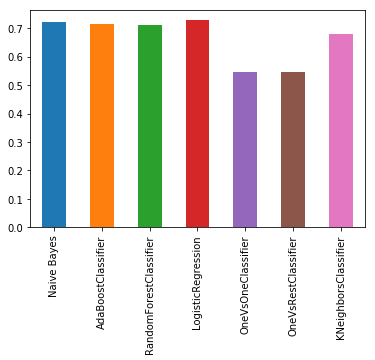

In [145]:
resultados_series.plot(kind="bar")

## Reavaliando algoritmos usando matriz de correlação

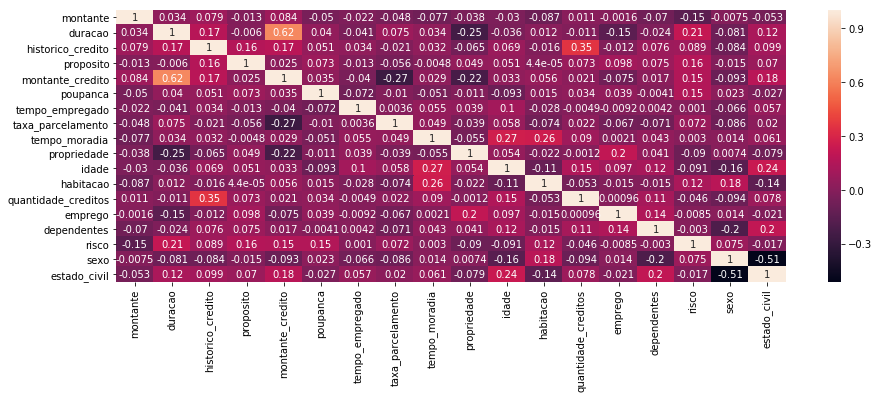

In [146]:
plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(),annot=True)

> **RETIRANDO COLUNAS MAIS CORRELACIONADAS : DURAÇÃO,PROPOSITO, MONTANTE_CREDITO, POUPANCA**

In [245]:
x = df.drop(columns=["risco","proposito","duracao","montante_credito","poupanca"])
y = df["risco"].values

In [246]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

In [247]:
algoritmos = {"Naive Bayes" : MultinomialNB(), "AdaBoost": AdaBoostClassifier(), 
              "RandomForest": RandomForestClassifier(), "LogisticRegression": LogisticRegression(), 
              "OneVsOne": OneVsOneClassifier(LinearSVC(random_state = 0)),
              "OneVsRest": OneVsRestClassifier(LinearSVC(random_state = 0)),
              "KNN": KNeighborsClassifier()
             }

In [248]:
for nome, modelo in algoritmos.items():
    resultado = aplicar_modelo(modelo,x_treino,y_treino,x_teste,y_teste)
    
    print("{}: {}%".format(nome,resultado))

Naive Bayes: 0.736%
AdaBoost: 0.744%
RandomForest: 0.752%
LogisticRegression: 0.756%
OneVsOne: 0.76%
OneVsRest: 0.76%
KNN: 0.716%


> **REMOVENDO MENOS CORRELACIONADAS : EMPREGO , DEPENDENTES, TEMPO_EMPREGADO**

In [242]:
x = df.drop(columns=["emprego" , "dependentes", "tempo_empregado"])
y = df["risco"].values

In [243]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

In [244]:
for nome, modelo in algoritmos.items():
    resultado = aplicar_modelo(modelo,x_treino,y_treino,x_teste,y_teste)
    
    print("{}: {}%".format(nome,resultado))

Naive Bayes: 0.628%
AdaBoost: 1.0%
RandomForest: 0.992%
LogisticRegression: 1.0%
OneVsOne: 0.56%
OneVsRest: 0.56%
KNN: 0.672%
